In [21]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [22]:
dataset = pd.read_csv('50_Startups.csv')


# Let's find the Correlation

In [23]:
c = dataset.corr()
c

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


### Draw the Graph

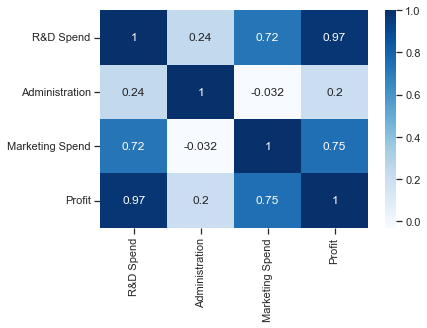

In [24]:
sns.heatmap(c,annot=True,cmap='Blues')
plt.show()

#### Base on Correretion Graph we can say what R&D Spend and Marketing Spends are directly proportional with the Profit

# Scatterplot Matrix

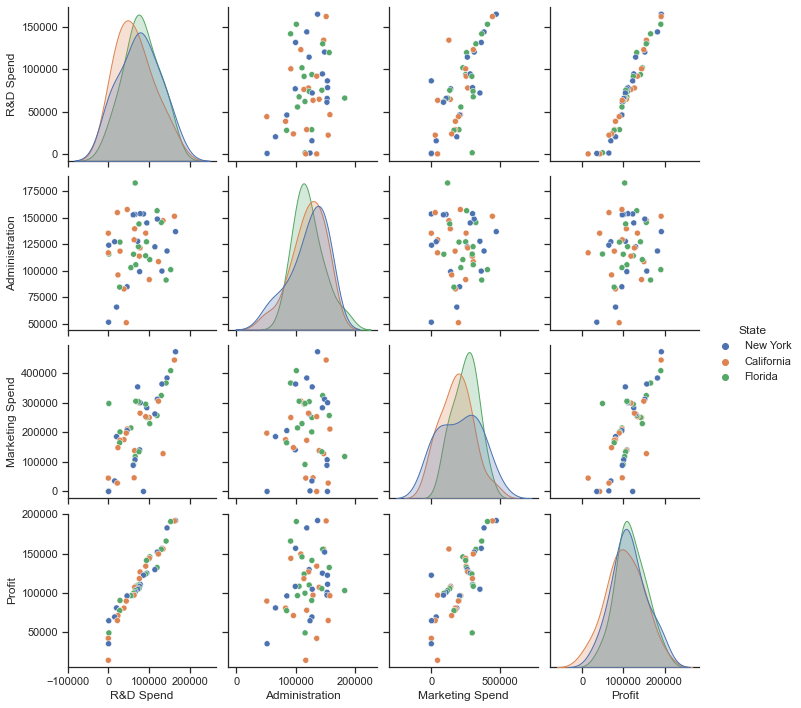

In [25]:

sns.set_theme(style="ticks")
sns.pairplot(dataset, hue="State")

# Create Graphs 


### Relationship with Profit 

<AxesSubplot:title={'center':'Marketing Spend Vs Profit'}, xlabel='Marketing Spend', ylabel='Profit'>

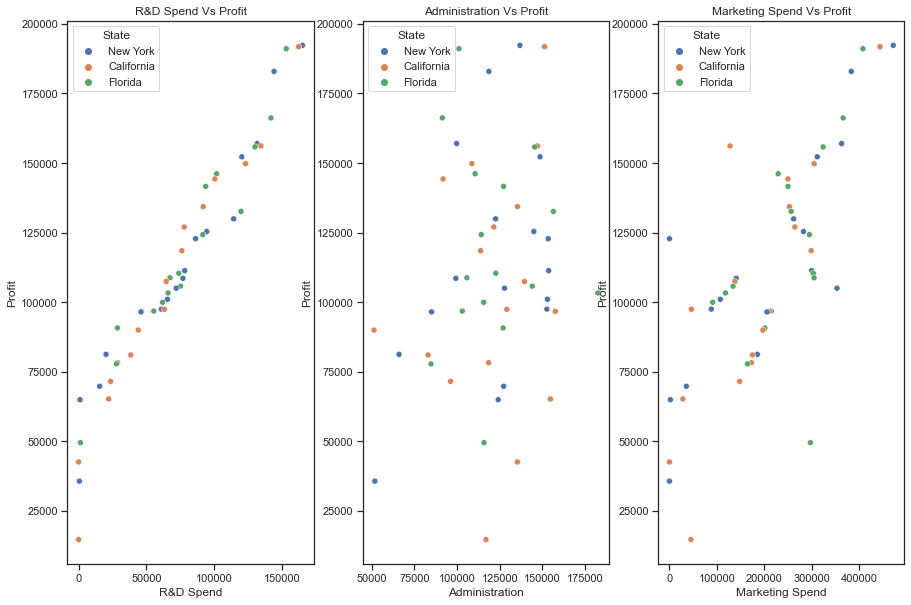

In [26]:

fig, axs = plt.subplots(ncols=3, figsize=(15,10))

axs[0].set_title('R&D Spend Vs Profit')
sns.scatterplot(x = "R&D Spend", y =  "Profit", hue="State", data=dataset, ax=axs[0])

axs[1].set_title('Administration Vs Profit')
sns.scatterplot(x = "Administration", y =  "Profit", hue="State",data=dataset, ax=axs[1])

axs[2].set_title('Marketing Spend Vs Profit')
sns.scatterplot(x = "Marketing Spend", y = "Profit", hue="State", data=dataset, ax=axs[2])


### Profitable States 

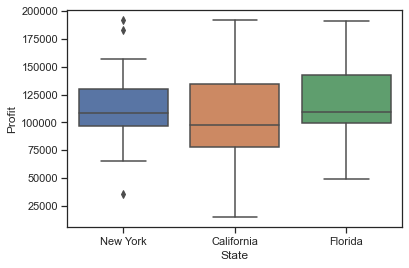

In [27]:

sns.boxplot(x = 'State', y = 'Profit', data = dataset)
plt.show()

# Histogram

array([[<AxesSubplot:title={'center':'R&D Spend'}>,
        <AxesSubplot:title={'center':'Administration'}>],
       [<AxesSubplot:title={'center':'Marketing Spend'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

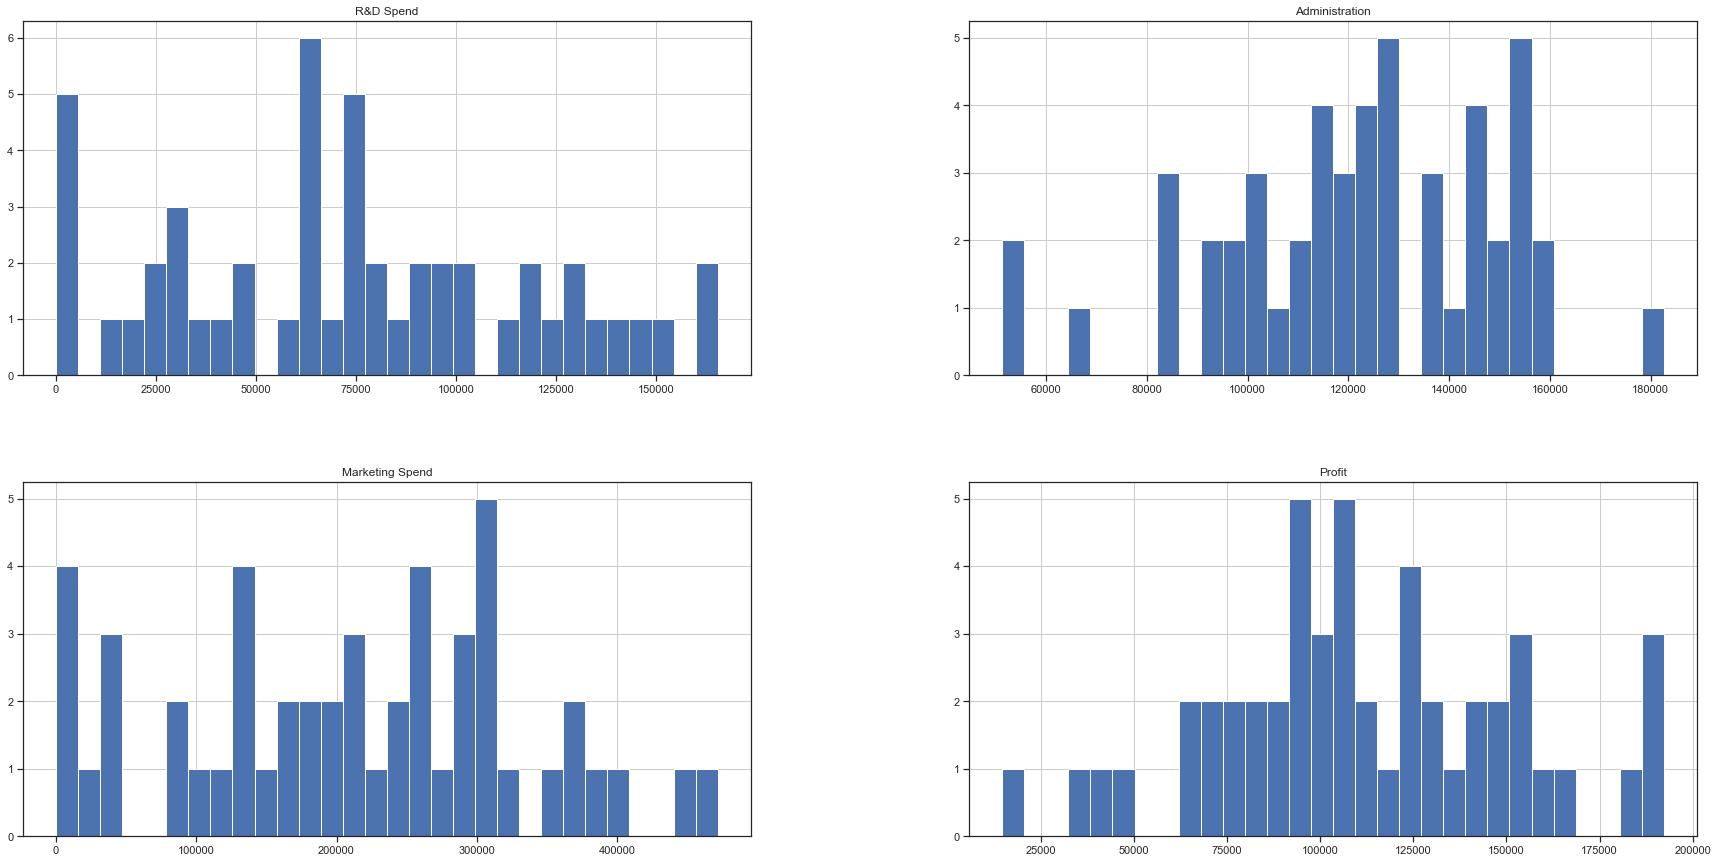

In [28]:

dataset.hist(bins=30, figsize=(30, 15))


# Using sklearn OneHotEncoder


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [30]:
df = dataset
df.State = le.fit_transform(df.State)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [31]:
ct = ColumnTransformer([('State', OneHotEncoder(), [3])], remainder = 'passthrough')
x = df.iloc[:, :-1].values
x =  ct.fit_transform(x)
x = x[:,1:]

In [32]:
y = df.Profit


# 3D

In [33]:
# Import library to produce a 3D plot
from mpl_toolkits.mplot3d import Axes3D


Text(0.5, 0, 'Profit')

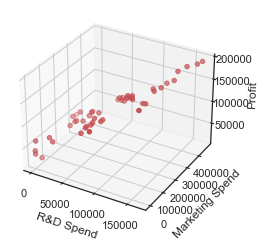

In [34]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x1 = dataset["R&D Spend"]
x2 = dataset["Marketing Spend"]

ax.scatter(x1, x2, y, c='r', marker='o')

# Set axis labels
ax.set_xlabel('R&D Spend')
ax.set_ylabel('Marketing Spend')
ax.set_zlabel('Profit')

# Training & Tests


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


## Training Model

#### Create linear regression model and fit it:

In [37]:
regressor = LinearRegression() # Regression object created
regressor.fit(X_train, y_train) # Training model


LinearRegression()

## Prediction 

In [38]:
y_pred = regressor.predict(X_test) # predicting 
y_pred = np.round(y_pred, 2)
y_pred

array([153405.84, 159662.27, 146929.61,  87657.7 ,  67833.78, 115178.21,
       161021.59, 174687.53, 155469.7 , 135028.82])

## Printing Real & Predicted Values


In [39]:
score=regressor.score(X_train,y_train)
score

0.9504367308465408

Text(0, 0.5, 'Expected result')

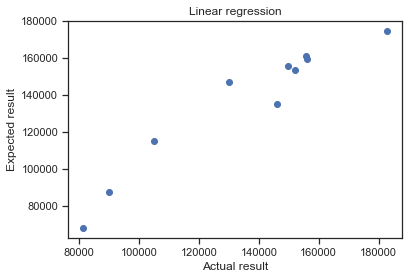

In [40]:
plt.scatter(y_test, y_pred)

plt.title('Linear regression')
plt.xlabel('Actual result')
plt.ylabel('Expected result')